### ***AR & ARIMA Model For Predictions***










-Prathamesh Sardeshmukh

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  import sys


Dataset Graph


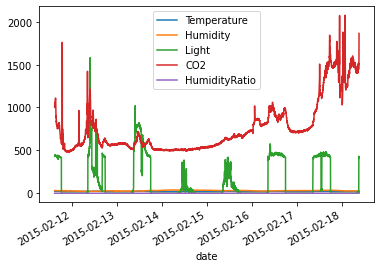

In [0]:
from pandas import datetime
import pandas as pd
import matplotlib.pyplot as plt

path="/content/drive/My Drive/ML codes/Time series/Dataset/datatest2.csv"          # Path of csv file location
def parser(x):
  return datetime.strptime(x,'%m/%d/%Y %H:%M')                                      # Mention dates and time formate eg 21/12/2013 as. %m/%d/%Y %H:%M 

mydata = pd.read_csv(path, index_col=0, parse_dates=[0] ,date_parser=parser)       #. index_col=0,  remian
mydata.head()
mydata.plot()
print("Dataset Graph")

# *Spliting data into Training and testing*




[:1601] indicates data is selected from 0 to 1601

[1601:1944] indicates data is selected 1601  to 1944

[1601:] indicates data is selected from 1601 to end



In [0]:

X= mydata['Temperature']

train= X[:6826]     #Fist1600 for train x
test = X[6826:]    # 343 for test 

predictions_AR =[]
print("Total data points = ",X)
len(X)

Total data points =  date
2015-02-11 14:48:00    21.7600
2015-02-11 14:49:00    21.7900
2015-02-11 14:50:00    21.7675
2015-02-11 14:51:00    21.7675
2015-02-11 14:51:00    21.7900
                        ...   
2015-02-18 09:15:00    20.8150
2015-02-18 09:16:00    20.8650
2015-02-18 09:16:00    20.8900
2015-02-18 09:17:00    20.8900
2015-02-18 09:19:00    21.0000
Name: Temperature, Length: 9752, dtype: float64


9752

### ***                                       *AR model***

In [0]:
# AR Model
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()
model_ar_fit.save('model_AR.pkl')
predictions_AR = model_ar_fit.predict(start=6826,end=9751)
print("Predictions = \n",predictions_AR[:10])
print("\n")
print("Test = \n",test[:10])

# Accuracy calculation

from sklearn.metrics import accuracy_score,r2_score
import sklearn
print("\n\n\n")
rmse= mean_squared_error(test, predictions_AR)
print("Root mean square  for AR =\t\t",rmse)
y_true=test
y_pred=predictions_AR
r2sq = r2_score(test, predictions_AR, sample_weight=None, multioutput='uniform_average')
print("R square  for AR = \t\t\t",r2sq)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Predictions = 
 6826    20.397987
6827    20.399393
6828    20.398920
6829    20.398052
6830    20.398950
6831    20.399825
6832    20.401416
6833    20.401804
6834    20.399807
6835    20.401656
dtype: float64


Test = 
 date
2015-02-16 08:34:00    20.390000
2015-02-16 08:35:00    20.390000
2015-02-16 08:36:00    20.390000
2015-02-16 08:37:00    20.390000
2015-02-16 08:38:00    20.390000
2015-02-16 08:38:00    20.390000
2015-02-16 08:39:00    20.426667
2015-02-16 08:41:00    20.390000
2015-02-16 08:42:00    20.445000
2015-02-16 08:43:00    20.500000
Name: Temperature, dtype: float64




Root mean square  for AR =		 0.48541344575998685
R square  for AR = 			 -0.2722832362742651


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


# Note : 
# **R^2 (Ideal value = 1)**

Best possible score is ***1.0***. A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
# **RMSE. (Ideal Value should be low ~ 0)** bold text
The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model's predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. ... Lower values of RMSE indicate better fit.

### *** *ARIMA Model***




In [0]:
# ARIMA
from statsmodels.tsa.arima_model import ARIMA
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(4,2, 2))
model_arima_fit = model_arima.fit()
print("AIC value = ",model_arima_fit.aic)
predictions_arima= model_arima_fit.forecast(steps=2926)[0]
#print("predictions of arima = ",predictions_arima)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


AIC value =  -28295.81600955467


In [0]:

print("Predictions of arima = \n",(predictions_arima))

print("Test data = \n",(test))


Predictions of arima = 
 [20.39713383 20.3975715  20.39663187 ... 19.13903503 19.13799829
 19.13696114]
Test data = 
 date
2015-02-16 08:34:00    20.390
2015-02-16 08:35:00    20.390
2015-02-16 08:36:00    20.390
2015-02-16 08:37:00    20.390
2015-02-16 08:38:00    20.390
                        ...  
2015-02-18 09:15:00    20.815
2015-02-18 09:16:00    20.865
2015-02-18 09:16:00    20.890
2015-02-18 09:17:00    20.890
2015-02-18 09:19:00    21.000
Name: Temperature, Length: 2926, dtype: float64


In [0]:
from sklearn.metrics import accuracy_score,r2_score
import sklearn
y_true=test
y_pred=predictions_arima

rmse_arima= mean_squared_error(test, predictions_arima)
print("Root mean square for ARIMA =\t\t",rmse_arima)

r2sq_arima = r2_score(test, predictions_arima, sample_weight=None, multioutput='uniform_average')
print("R Square for ARIMA  =\t\t\t",r2sq_arima)


Root mean square for ARIMA =		 1.4670763574038728
R Square for ARIMA  =			 -2.8452512433744377


# ***Hyperparameter tunning All possible values for p q d ***

Select the Aic value from below output and use respective (p, q, d) value in above function for training.

In [0]:
# Varoius valoues of p  q. d 
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 21289.893576840892
(0, 0, 1) 12189.656258907782
(0, 0, 2) 4573.935002023723
(0, 0, 3) -1262.579633906851
(0, 0, 4) -5566.070236795815
(0, 1, 0) -27159.04244983851
(0, 1, 1) -27850.84109299906
(0, 1, 2) -27909.744859473944
(0, 1, 3) -27987.37763193157
(0, 1, 4) -28050.98389888623
(0, 2, 0) -20558.9070468646
(0, 2, 1) -27218.713829816043
(1, 0, 0) -27155.78010648924
(1, 0, 1) -27846.52009488677
(1, 0, 2) -27905.536927502915
(1, 0, 3) -27983.311465523322
(1, 0, 4) -28047.05344879273
(1, 1, 0) -27867.27849342844
(1, 1, 1) -27887.623154772544
(1, 1, 2) -28336.180894286084
(1, 1, 3) -28334.7292579152
(1, 1, 4) -28340.02525659581
(1, 2, 0) -24063.57734160874
(1, 2, 2) -28288.069133882505
(1, 2, 3) -28283.37733731678
(1, 2, 4) -28287.28069724208
(2, 0, 0) -27863.135605285577
(2, 0, 1) -27883.35627371804
(2, 0, 2) -28339.218756331087
(2, 0, 3) -28338.204511616626
(2, 0, 4) -28345.058294740447
(2, 1, 0) -27896.867889045596
(2, 1, 1) -28157.736044137495
(2, 1, 2) -28334.653967391267
(2,

### ***LSTM FROM TENSORFLOW***

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd



mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

path_m = path
df = pd.read_csv(path_m)
df.head()
dates=df['date']
temp= df['Temperature']
print(temp)


def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)



0       21.7600
1       21.7900
2       21.7675
3       21.7675
4       21.7900
         ...   
9747    20.8150
9748    20.8650
9749    20.8900
9750    20.8900
9751    21.0000
Name: Temperature, Length: 9752, dtype: float64


In [0]:
TRAIN_SPLIT = 6825
#tf.random.set_seed(13)
uni_data = df['Temperature']
uni_data.index = df['date']
uni_data.head()

date
2/11/2015 14:48    21.7600
2/11/2015 14:49    21.7900
2/11/2015 14:50    21.7675
2/11/2015 14:51    21.7675
2/11/2015 14:51    21.7900
Name: Temperature, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9709c32b0>],
      dtype=object)

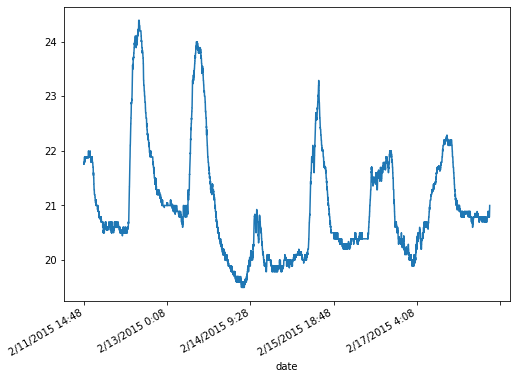

In [0]:
uni_data.plot(subplots=True)

In [0]:
uni_data = uni_data.values
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)
x_train_uni.shape

(6805, 20, 1)

In [0]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[21.76      ]
 [21.79      ]
 [21.7675    ]
 [21.7675    ]
 [21.79      ]
 [21.76      ]
 [21.79      ]
 [21.79      ]
 [21.79      ]
 [21.79      ]
 [21.79      ]
 [21.79      ]
 [21.79      ]
 [21.79      ]
 [21.79      ]
 [21.815     ]
 [21.815     ]
 [21.89      ]
 [21.79      ]
 [21.82333333]]

 Target temperature to predict
21.865


In [0]:
def create_time_steps(length):
  return list(range(-length, 0))
  
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

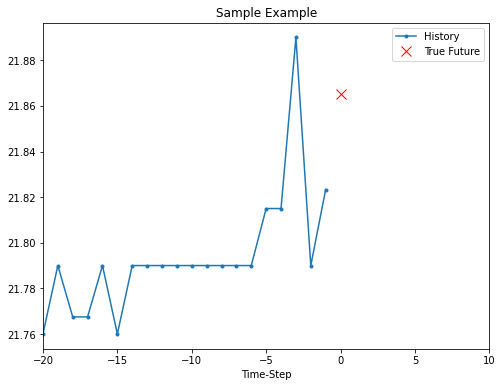

In [0]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [0]:
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

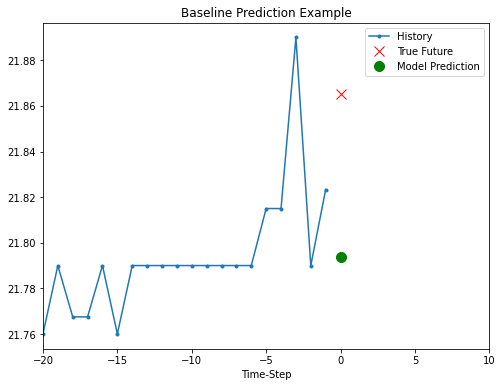

In [0]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [0]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [0]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
       

    tf.keras.layers.Dense(4),
        tf.keras.layers.Dense(2),
            tf.keras.layers.Dense(1)    


])
#simple_lstm_model.add(Dense(2))
simple_lstm_model.compile(optimizer='adam', loss='mae',metrics=[tf.keras.metrics.MeanAbsoluteError()])
simple_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 320       
_________________________________________________________________
dense (Dense)                (None, 4)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [0]:
tf.executing_eagerly()
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(256, 1)


In [0]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

x=simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                        
                      steps_per_epoch=EVALUATION_INTERVAL,

                      validation_data=val_univariate, validation_steps=50)


Epoch 1/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - val_loss: 0.0236 - val_mean_absolute_error: 0.0238
Epoch 2/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - val_loss: 0.0372 - val_mean_absolute_error: 0.0372
Epoch 3/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - val_loss: 0.0328 - val_mean_absolute_error: 0.0330
Epoch 4/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0296 - mean_absolute_error: 0.0297 - val_loss: 0.0316 - val_mean_absolute_error: 0.0317
Epoch 5/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - val_loss: 0.0310 - val_mean_absolute_error: 0.0311
Epoch 6/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - val_loss: 0.0237 - val_mean_absolute_error: 0.0238
Epoch 7/10

In [0]:
print("Average test loss: ", np.average(x.history['loss']))
#x.history['loss']
# 0.02. 300   10      8,1     # ok
# 1.97  300.   10.      8,4,1.   
# 1.0.  300    10      8,8,4,1
#.      200.   10.     8,16,8,4,1

# 1.5   300.   10.    8,8,1.   # Best

# 0.03. 300.   10.    8,4,1.   # best
# 0.03. 200.   10.    8,4,1.   # V .best
# 0.17.  150.  10.    8,4,2,1. # V Best
# 0.03.  200.  10.    8,4,2,1. # VV Best

Average test loss:  0.03198706805706024


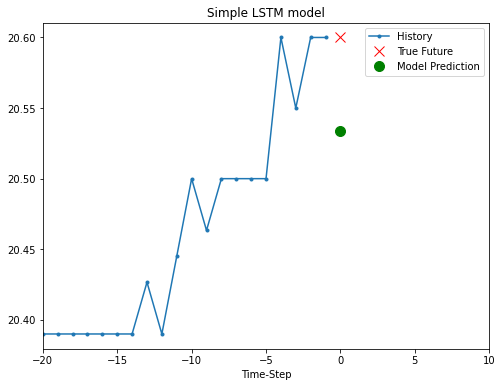

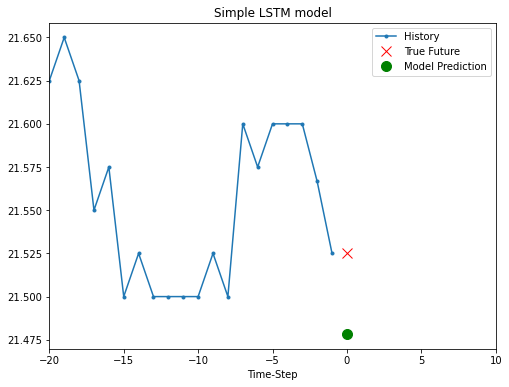

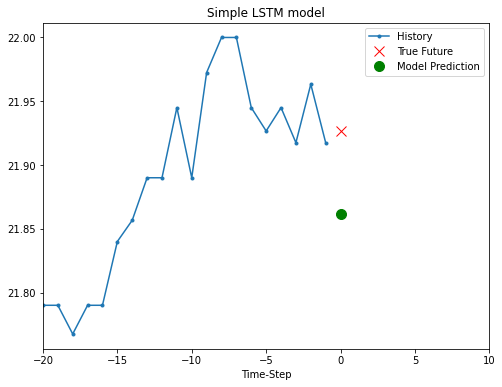

In [0]:


for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()